<a href="https://colab.research.google.com/github/glcn35/statistics/blob/main/Statistics_Assignment_5_(Hypothesis_Tests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [15]:
import scipy
print(scipy.__version__)

1.4.1


In [ ]:
pip install --upgrade scipy

In [56]:
import scipy
print(scipy.__version__)

1.7.3


EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

EXERCISE 1.  Belirli bir sektördeki saatlik ücretler normal olarak ortalama 13,20$ ve standart sapma 2,50$ ile dağıtılır. Bu sektördeki bir şirket 40 işçi çalıştırıyor ve onlara saatte ortalama 12,20 dolar ödüyor. Bu şirket standartların altında ücret ödemekle suçlanabilir mi? Bir α = .01 seviye testi kullanın. (Wackerly, Ör.10.18)

KONTROL: istatistik: -2.5298221281347035, pdeğeri= 0.005706018193000826

In [57]:
mu=13.20 
s=2.50  
alpha = 0.01
size=40

In [58]:
# H0: mu = 13,20   #ho da populasyon parametresi olur
# H1: mu <13,20    #sol kuyrukta arayacağım düşük istenmez yüksekse sıkıntı olmaz

In [35]:
xbar=12.20  #yukarıda direkt ortalama mevcut

In [59]:
s_hata = s/np.sqrt(40)  #sampleın sapmasını hesapladım
s_hata

0.3952847075210474

In [60]:
t_test = (xbar - 13.20) / (s/np.sqrt(40))
t_test

-2.5298221281347035

In [77]:
stats.t.cdf(t_test, df=39)

0.0077816812266594355

In [76]:
oneSamp = stats.ttest_1samp(xbar, popmean=13.20,alternative="less")
oneSamp

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_1sampResult(statistic=nan, pvalue=nan)

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

ALIŞTIRMA 2. İki tip zemin için serbest basınç deneylerinden elde edilen kesme mukavemeti ölçümleri, aşağıdaki belgede gösterilen sonuçları vermiştir (metre kare başına ton cinsinden ölçümler). Zeminler, %1 anlamlılık düzeyinde ortalama kesme dayanımına göre farklılık gösteriyor mu?

İki tip zemin için sonuçlar

KONTROL: istatistik: 5.1681473319343345, pvalue= 2.593228732352821e-06

Independent Samples T Test Bağımsız Numuneler T Testi

In [167]:
df=pd.read_csv("/content/sample_data/soil - Sheet1.csv")  # na_values="0" da diyebilirmiyiz oratlamayı değiştirmemesi için?

In [168]:
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [169]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(df["Soil1"][:30],df["Soil2"] )  
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [170]:
df.Soil1.mean()

1.6918

In [171]:
df.Soil2.mean()

1.4171142857142855

In [174]:
indTest = stats.ttest_ind(df.Soil1[:30],df.Soil2 , equal_var=True)  
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

 Aşağıdaki veri seti Dünya Bankası tarafından sağlanan verilere dayanmaktadır (https://datacatalog.worldbank.org/dataset/education-statistics). Dünya Bankası Edstatları.  2015 PISA Testi Veri Seti

Her kıta grubu (AS, EU, AF, NA, SA, OC) için tanımlayıcı istatistikleri (bir veri kümesinin dağılımının merkezi eğilimi, dağılımı ve şekli) alın.
Avrupa (AB) ve Asya (AS) ülkeleri arasında matematik puanları için (ortalama olarak) herhangi bir fark olup olmadığını belirleyin (normallik ve eşit varyanslar varsayalım). Yan yana kutu çizimleri çizin.
KONTROL: istatistik=0.870055317967983, pdeğer=0.38826888111307345

In [79]:
df=pd.read_csv("/content/sample_data/2015 PISA Test - Sheet1.csv")
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [139]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [108]:
df.groupby("Continent_Code")["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

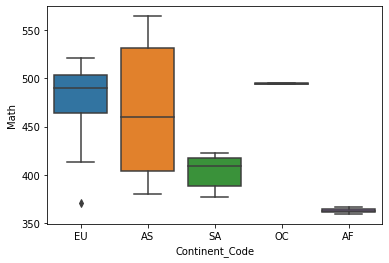

In [119]:
sns.boxplot(x="Continent_Code", y="Math", data=df)

In [ ]:
Math_AS=df[df["Continent_Code"]=="AS"].Math
Math_AS

In [141]:
df[df["Continent_Code"]=="AS"].Math.mean()

466.2166470588236

In [142]:
df[df["Continent_Code"]=="AS"].Math.std()

64.3564901327764

In [ ]:
Math_EU=df[df["Continent_Code"]=="EU"].Math
Math_EU

In [143]:
df[df["Continent_Code"]=="EU"].Math.mean()

477.98144864864867

In [144]:
df[df["Continent_Code"]=="EU"].Math.std()

35.15040262727062

In [162]:
leveneTest = stats.levene(Math_EU,Math_AS )
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [164]:
indTest = stats.ttest_ind(Math_EU,Math_AS, equal_var=True)   
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128



ALIŞTIRMA 4. Örnek veri seti, dört konu alanı için (100 puan üzerinden) yerleştirme testi puanlarına sahiptir: İngilizce, Okuma, Matematik ve Yazma. Örneklemdeki öğrenciler, üniversiteye kayıt olduklarında 4 yerleştirme sınavının hepsini tamamlamıştır. Özellikle İngilizce ve Matematik bölümleriyle ilgilendiğimizi ve öğrencilerin İngilizce veya Matematik sınavlarında ortalama olarak daha yüksek puan alıp almadıklarını belirlemek istediğimizi varsayalım. İki testin ortalamasında anlamlı bir fark olup olmadığını test etmek için eşleştirilmiş bir t testi kullanabiliriz.

Örnek Veri Kümesi 2014

KONTROL: istatistik=36.312568981719856, pvalue=3.0710987192210606e-128

In [189]:
df=pd.read_csv("/content/sample_data/students_2014 - students_2014.csv")
df

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,0.0,NaN,0:12:55,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,0.0,9.125,0:08:33,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,0.0,NaN,NaN,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,2.0,6.905,0:08:26,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [190]:
df.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [182]:
df.English.mean()

65.46800947867297

In [183]:
df.English.mean()

82.78755501222493

In [193]:
leveneTest = stats.levene(df.Math,df.English)
leveneTest

LeveneResult(statistic=nan, pvalue=nan)

In [192]:
leveneTest = stats.levene(df.dropna().Math,df.dropna().English)
leveneTest

LeveneResult(statistic=5.7875411122197455, pvalue=0.017905722007011377)

In [196]:
indTest = stats.ttest_ind(df.dropna().English,df.dropna().Math, equal_var=False)   
indTest

Ttest_indResult(statistic=10.78720564180352, pvalue=7.522665087314722e-18)

In [197]:
indTest = stats.ttest_ind(df.fillna(df.English.mean()).English,df.fillna(df.Math.mean()).Math, equal_var=False)   
indTest

Ttest_indResult(statistic=34.12748503421804, pvalue=3.532675272194183e-160)

In [203]:
indTest = stats.ttest_ind(df.fillna(method="pad").English,df.fillna(method="pad").Math, equal_var=False)   
indTest

Ttest_indResult(statistic=33.32571273318621, pvalue=4.599359012017855e-155)

In [205]:
indTest = stats.ttest_ind(df.dropna().English, df.dropna().Math, equal_var=False)   
indTest

Ttest_indResult(statistic=10.78720564180352, pvalue=7.522665087314722e-18)